<a href="https://colab.research.google.com/github/wenxuan0923/My-notes/blob/master/DL_example_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deep Learning: Multiclass Classification 
#### - Reuters dataset

Multiclass classification problem with 46 classes.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [0]:
print('Train data shape: {}'.format(train_data.shape))
print('Test data shape: {}'.format(test_data.shape))

Train data shape: (8982,)
Test data shape: (2246,)


In [0]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

Again, the length of these texts are different. 

In [0]:
np.array([len(lst) for lst in train_data])

array([ 87,  56, 139, ...,  77, 119, 105])

In [0]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

Tere are 46 classes labeled from 0 to 45.

In [0]:
print(min(train_labels))
print(max(train_labels))

0
45


#### Prepare the data

**Vectorize the news data**

In the binary classification problem (IMDB Reviews sentiment analysis), we defined a function to vectorize the reviews data, we will apply the same method here to vectorize the text data.

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
    return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
x_train.shape

(8982, 10000)

Now both the train_data and test_data have became 2D tensor (samples, features) with same length which is 10000.

**There are two ways to vectorize the labels**
1. Cast the label list as an integer tensor
2. Use **ont-hot encoding**: return a with only 1 item inside equals to 1 (the corresponding class) and all the other terms to be 0

There is a built-in function to do one hot encoding in Keras, let's try it.


In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
one_hot_train_labels.shape

(8982, 46)

In [0]:
np.sum(one_hot_train_labels[0])  # only one of items in the list is 1

1.0

### Model training

Now it's time to built our network. Note that we are doing multiclass classification here, we need to change the activation function of the output layer to softmax instead of using sigmoid. The network will produce a 46 dimensional output vector, where output\[i] is the probability that the sample belongs to class i.

In [0]:
from keras import models
from keras import layers

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Let's set apart 1000 samples for validation.


In [0]:
x_val = x_train[:1000]
y_val = one_hot_train_labels[:1000]
partial_x_train = x_train[1000:]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,  
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 123us/step - loss: 2.3994 - accuracy: 0.5465 - val_loss: 1.5911 - val_accuracy: 0.6680
Epoch 2/20
7982/7982 [==============================] - 1s 113us/step - loss: 1.3396 - accuracy: 0.7226 - val_loss: 1.2752 - val_accuracy: 0.7130
Epoch 3/20
7982/7982 [==============================] - 1s 112us/step - loss: 1.0207 - accuracy: 0.7750 - val_loss: 1.1446 - val_accuracy: 0.7460
Epoch 4/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.8080 - accuracy: 0.8250 - val_loss: 1.0126 - val_accuracy: 0.7890
Epoch 5/20
7982/7982 [==============================] - 1s 115us/step - loss: 0.6382 - accuracy: 0.8634 - val_loss: 0.9544 - val_accuracy: 0.8050
Epoch 6/20
7982/7982 [==============================] - 1s 113us/step - loss: 0.5110 - accuracy: 0.8938 - val_loss: 0.9055 - val_accuracy: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 113us/step - loss

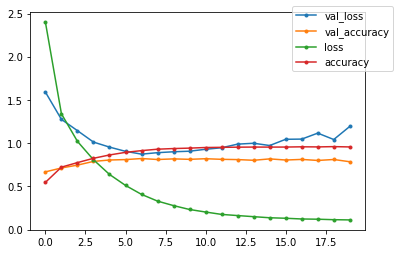

In [0]:
ax = pd.DataFrame(history.history).plot(marker='.')
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

The network begins to overfit after nine epochs. Let's train a new network with 9 epochs and then evaluate it on the test set.

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

new_history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=8,
                        batch_size=512,
                        validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 122us/step - loss: 2.5890 - accuracy: 0.5208 - val_loss: 1.6873 - val_accuracy: 0.6230
Epoch 2/8
7982/7982 [==============================] - 1s 117us/step - loss: 1.4058 - accuracy: 0.7056 - val_loss: 1.2913 - val_accuracy: 0.7210
Epoch 3/8
7982/7982 [==============================] - 1s 115us/step - loss: 1.0537 - accuracy: 0.7766 - val_loss: 1.1521 - val_accuracy: 0.7540
Epoch 4/8
7982/7982 [==============================] - 1s 116us/step - loss: 0.8272 - accuracy: 0.8249 - val_loss: 1.0634 - val_accuracy: 0.7750
Epoch 5/8
7982/7982 [==============================] - 1s 115us/step - loss: 0.6622 - accuracy: 0.8589 - val_loss: 0.9912 - val_accuracy: 0.8090
Epoch 6/8
7982/7982 [==============================] - 1s 113us/step - loss: 0.5306 - accuracy: 0.8879 - val_loss: 0.9532 - val_accuracy: 0.8100
Epoch 7/8
7982/7982 [==============================] - 1s 115us/step - loss: 0.425

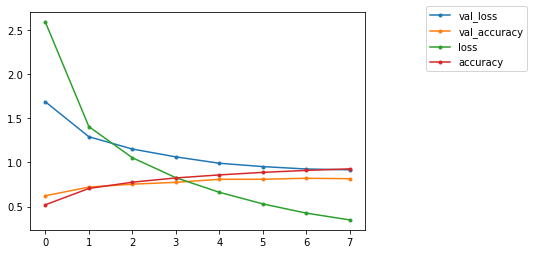

In [0]:
ax = pd.DataFrame(new_history.history).plot(marker='.')
ax.legend(bbox_to_anchor=(1.5, 1.05))
plt.show()

In [0]:
# `model.evaluate()` return the loss value and metrics value for the model in test mode
model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 83us/step


[0.9937797524731603, 0.7813891172409058]

### Make prediction on new data

The prediction result of this model is the list of probability of the sample belongs to each of the 46 class, and thus, a 46-dimensional vector.

The summation of the probability the sample belongs to each class equals to 1.

In [0]:
proba = model.predict(x_test)
proba

array([[3.5271831e-05, 1.1702743e-04, 5.1434574e-05, ..., 5.5828503e-05,
        1.5535636e-05, 2.6664900e-05],
       [1.7473346e-03, 1.7221931e-02, 8.5507444e-04, ..., 1.2954042e-03,
        1.3611772e-05, 5.4352509e-05],
       [7.8801792e-03, 5.3998876e-01, 5.1739989e-03, ..., 6.9650295e-03,
        1.1240768e-03, 1.0169288e-03],
       ...,
       [1.5945185e-05, 1.5919759e-04, 9.3163646e-05, ..., 2.1416748e-05,
        1.1203689e-05, 4.9396000e-05],
       [3.6489079e-03, 4.5696642e-02, 2.8513388e-03, ..., 1.9538945e-03,
        1.6224653e-03, 1.7449320e-03],
       [1.3702868e-03, 4.1372690e-01, 2.5597010e-02, ..., 4.8560137e-03,
        2.5342440e-04, 3.1512600e-04]], dtype=float32)

In [0]:
proba.shape

(2246, 46)

In [0]:
np.sum(proba[0])

1.0

To convert the probability to classes (labels):

In [0]:
qnp.argmax(proba[0])

3

In [0]:
np.array([np.argmax(lst) for lst in proba])

array([ 3, 10,  1, ...,  3,  4,  1])

**An important takeaway from this example:**

The final outputs are 46-dimensional, you should AVOID having intermediate layers with many fewer than 46 hidden units, because you will drop too much information in those intermediate layers and thus won't have encough info to recover the separation hyperplanes of 46 classes.